In [1]:
from data.simulation_functions import Bukin06, Price03
bukin = Bukin06(1000)
features = bukin.build_features(n_data=500).sort(axis=0).values
targets = bukin.calculate_targets(*features.permute(1,0))

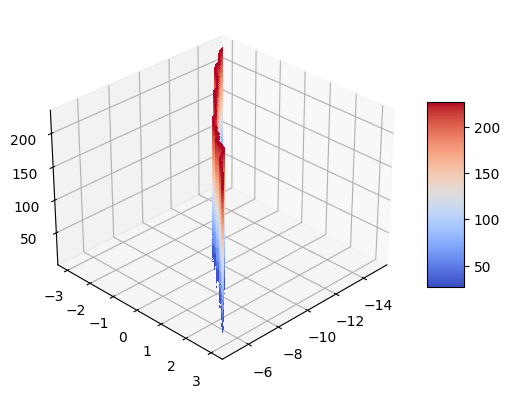

In [35]:

from matplotlib import cm
import numpy as np
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = features[:,0].numpy()
Y = features[:,1].numpy()
Z = targets.reshape(-1,1).numpy()

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 45)
fig.colorbar(surf, shrink=0.5, aspect=5);

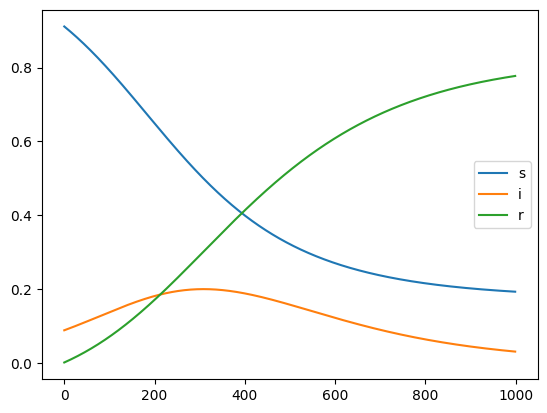

In [14]:
import matplotlib.pyplot as plt
from data.epidemiology import EpidemiologyDataset
ds = EpidemiologyDataset(1/80, 1/160, 1000, [], None)
s, i, r = next(iter(ds)).permute(1,0)
plt.plot(s, label="s")
plt.plot(i, label="i")
plt.plot(r, label="r")
plt.legend()